In [9]:
from vierlinden.config import model_output_path
from vierlinden.data.loader import VierlindenDataProcessor
from vierlinden.model.model import NHiTSTrainingWrapper, NHiTSPredictionWrapper
from vierlinden.model.model import NHiTSPredictionWrapper

seed = 42

context_length = 50
prediction_length = 10
batch_size = 32
num_workers = 18

def main(arg : str):
    dp = VierlindenDataProcessor()
    df = dp.load_processed_data()
    df = dp.prepare_for_target(df, arg)
    
    training_df, test_df = dp.split_data(df)
    
    nhits_wrapper = NHiTSTrainingWrapper(training_df, 
                                         target_col = arg, 
                                         context_length = context_length, 
                                         prediction_length = prediction_length,
                                         batch_size = batch_size, 
                                         num_workers = num_workers)
    optimal_lr = nhits_wrapper.find_optimal_learningrate(seed = seed)
    
    print(f"Optimal learning rate for {arg}: {optimal_lr}")
    
    best_model = nhits_wrapper.train(optimal_lr, seed = seed)
    
    return nhits_wrapper, test_df

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


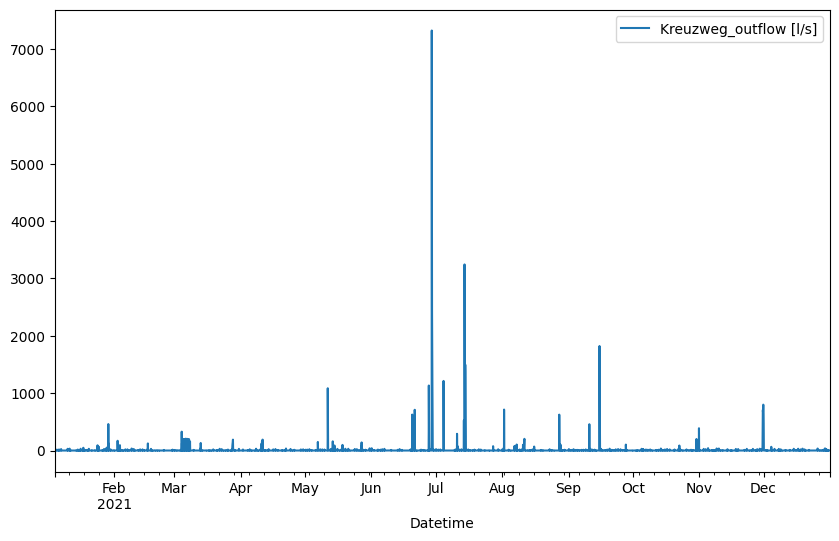

In [10]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kreuzweg_outflow [l/s]')
dp.plot_target_col('Kreuzweg_outflow [l/s]')

In [11]:
dp = VierlindenDataProcessor()
df = dp.load_processed_data()
df = dp.prepare_for_target(df, 'Kreuzweg_outflow [l/s]')

training_df, test_df = VierlindenDataProcessor.split_data(df, train_frac=0.9)
test_df.shape

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.


(868, 24)

In [12]:
nhits_wrapper, test_df = main('Kreuzweg_outflow [l/s]')

model = nhits_wrapper.best_model

INFO:vierlinden.data.loader:Data loaded successfully from /storage/projects/RIWWER/data/Vierlinden
INFO:vierlinden.data.loader:Sensor and target data merged successfully.
INFO:vierlinden.data.loader:NaN values processed successfully.
INFO:vierlinden.data.loader:Data loaded and processed successfully.
INFO:vierlinden.model.model:Training and validation data and data loaders created successfully.
Global seed set to 42
Finding best initial lr: 100%|██████████| 100/100 [00:02<00:00, 35.68it/s]
INFO:vierlinden.model.model:Start setting up trainer and network.
Global seed set to 42
INFO:vierlinden.model.model:Setup succesful. Starting training procedure.

  | Name            | Type           | Params
---------------------------------------------------
0 | loss            | MAE            | 0     
1 | logging_metrics | ModuleList     | 0     
2 | embeddings      | MultiEmbedding | 0     
3 | model           | NHiTS          | 919 K 
---------------------------------------------------
919 K   

Optimal learning rate for Kreuzweg_outflow [l/s]: 0.00012589254117941672
Epoch 0: 100%|██████████| 193/193 [00:34<00:00,  5.53it/s, v_num=0, train_loss_step=10.80, val_loss=3.570, train_loss_epoch=24.20]

Metric val_loss improved. New best score: 3.566


Epoch 1: 100%|██████████| 193/193 [00:35<00:00,  5.46it/s, v_num=0, train_loss_step=19.20, val_loss=3.350, train_loss_epoch=23.00]

Metric val_loss improved by 0.212 >= min_delta = 0.0001. New best score: 3.354


Epoch 2: 100%|██████████| 193/193 [00:36<00:00,  5.28it/s, v_num=0, train_loss_step=44.70, val_loss=3.270, train_loss_epoch=22.10]

Metric val_loss improved by 0.086 >= min_delta = 0.0001. New best score: 3.267


Epoch 3: 100%|██████████| 193/193 [00:37<00:00,  5.21it/s, v_num=0, train_loss_step=5.110, val_loss=3.210, train_loss_epoch=21.20]

Metric val_loss improved by 0.061 >= min_delta = 0.0001. New best score: 3.206


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=5.110, val_loss=3.210, train_loss_epoch=21.20]          

Swapping scheduler `ReduceLROnPlateau` for `SWALR`


Epoch 4: 100%|██████████| 193/193 [00:37<00:00,  5.21it/s, v_num=0, train_loss_step=9.860, val_loss=3.160, train_loss_epoch=20.20]

Metric val_loss improved by 0.050 >= min_delta = 0.0001. New best score: 3.156


Epoch 5: 100%|██████████| 193/193 [00:38<00:00,  4.96it/s, v_num=0, train_loss_step=5.100, val_loss=3.120, train_loss_epoch=19.60]

Metric val_loss improved by 0.033 >= min_delta = 0.0001. New best score: 3.123


Epoch 6: 100%|██████████| 193/193 [00:35<00:00,  5.48it/s, v_num=0, train_loss_step=27.90, val_loss=3.120, train_loss_epoch=19.10]

Metric val_loss improved by 0.003 >= min_delta = 0.0001. New best score: 3.120


Epoch 7: 100%|██████████| 193/193 [00:38<00:00,  4.95it/s, v_num=0, train_loss_step=39.80, val_loss=3.050, train_loss_epoch=18.60]

Metric val_loss improved by 0.071 >= min_delta = 0.0001. New best score: 3.050


Epoch 8: 100%|██████████| 193/193 [00:36<00:00,  5.25it/s, v_num=0, train_loss_step=8.150, val_loss=3.040, train_loss_epoch=18.40]

Metric val_loss improved by 0.009 >= min_delta = 0.0001. New best score: 3.041


Epoch 10: 100%|██████████| 193/193 [00:37<00:00,  5.19it/s, v_num=0, train_loss_step=5.910, val_loss=2.950, train_loss_epoch=17.80]

Metric val_loss improved by 0.088 >= min_delta = 0.0001. New best score: 2.953


Epoch 11: 100%|██████████| 193/193 [00:43<00:00,  4.44it/s, v_num=0, train_loss_step=22.60, val_loss=2.950, train_loss_epoch=17.80]

Metric val_loss improved by 0.001 >= min_delta = 0.0001. New best score: 2.952


Epoch 12: 100%|██████████| 193/193 [00:37<00:00,  5.21it/s, v_num=0, train_loss_step=8.880, val_loss=2.900, train_loss_epoch=17.50]

Metric val_loss improved by 0.050 >= min_delta = 0.0001. New best score: 2.902


Epoch 13: 100%|██████████| 193/193 [00:37<00:00,  5.12it/s, v_num=0, train_loss_step=4.900, val_loss=2.840, train_loss_epoch=17.40]

Metric val_loss improved by 0.059 >= min_delta = 0.0001. New best score: 2.842


Epoch 14: 100%|██████████| 193/193 [00:43<00:00,  4.45it/s, v_num=0, train_loss_step=5.830, val_loss=2.830, train_loss_epoch=17.00]

Metric val_loss improved by 0.017 >= min_delta = 0.0001. New best score: 2.825


Epoch 15: 100%|██████████| 193/193 [00:38<00:00,  5.04it/s, v_num=0, train_loss_step=30.40, val_loss=2.810, train_loss_epoch=16.80]

Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 2.815


Epoch 16: 100%|██████████| 193/193 [00:38<00:00,  5.05it/s, v_num=0, train_loss_step=1.910, val_loss=2.760, train_loss_epoch=16.70]

Metric val_loss improved by 0.052 >= min_delta = 0.0001. New best score: 2.763


Epoch 17: 100%|██████████| 193/193 [00:38<00:00,  5.07it/s, v_num=0, train_loss_step=7.760, val_loss=2.720, train_loss_epoch=16.90]

Metric val_loss improved by 0.041 >= min_delta = 0.0001. New best score: 2.722


Epoch 19: 100%|██████████| 193/193 [00:38<00:00,  5.01it/s, v_num=0, train_loss_step=10.10, val_loss=2.610, train_loss_epoch=16.40]

Metric val_loss improved by 0.108 >= min_delta = 0.0001. New best score: 2.614


Epoch 20: 100%|██████████| 193/193 [00:38<00:00,  4.97it/s, v_num=0, train_loss_step=14.20, val_loss=2.590, train_loss_epoch=16.30]

Metric val_loss improved by 0.022 >= min_delta = 0.0001. New best score: 2.592


Epoch 21: 100%|██████████| 193/193 [00:38<00:00,  4.98it/s, v_num=0, train_loss_step=6.230, val_loss=2.580, train_loss_epoch=16.20]

Metric val_loss improved by 0.011 >= min_delta = 0.0001. New best score: 2.581


Epoch 22: 100%|██████████| 193/193 [00:38<00:00,  4.98it/s, v_num=0, train_loss_step=28.50, val_loss=2.500, train_loss_epoch=16.10]

Metric val_loss improved by 0.079 >= min_delta = 0.0001. New best score: 2.502


Epoch 23: 100%|██████████| 193/193 [00:48<00:00,  3.96it/s, v_num=0, train_loss_step=13.70, val_loss=2.470, train_loss_epoch=15.80]

Metric val_loss improved by 0.029 >= min_delta = 0.0001. New best score: 2.474


Epoch 24: 100%|██████████| 193/193 [00:39<00:00,  4.84it/s, v_num=0, train_loss_step=8.190, val_loss=2.430, train_loss_epoch=15.80]

Metric val_loss improved by 0.039 >= min_delta = 0.0001. New best score: 2.435


Epoch 25: 100%|██████████| 193/193 [00:39<00:00,  4.87it/s, v_num=0, train_loss_step=15.10, val_loss=2.400, train_loss_epoch=15.70]

Metric val_loss improved by 0.035 >= min_delta = 0.0001. New best score: 2.400


Epoch 26: 100%|██████████| 193/193 [00:39<00:00,  4.84it/s, v_num=0, train_loss_step=4.960, val_loss=2.370, train_loss_epoch=15.50]

Metric val_loss improved by 0.029 >= min_delta = 0.0001. New best score: 2.371


Epoch 27: 100%|██████████| 193/193 [00:39<00:00,  4.83it/s, v_num=0, train_loss_step=8.820, val_loss=2.360, train_loss_epoch=15.20]

Metric val_loss improved by 0.012 >= min_delta = 0.0001. New best score: 2.359


Epoch 28: 100%|██████████| 193/193 [00:51<00:00,  3.77it/s, v_num=0, train_loss_step=4.370, val_loss=2.310, train_loss_epoch=15.40]

Metric val_loss improved by 0.053 >= min_delta = 0.0001. New best score: 2.306


Epoch 29: 100%|██████████| 193/193 [00:41<00:00,  4.65it/s, v_num=0, train_loss_step=48.50, val_loss=2.300, train_loss_epoch=15.50]

Metric val_loss improved by 0.007 >= min_delta = 0.0001. New best score: 2.299


Epoch 30: 100%|██████████| 193/193 [00:39<00:00,  4.84it/s, v_num=0, train_loss_step=4.950, val_loss=2.230, train_loss_epoch=15.10]

Metric val_loss improved by 0.070 >= min_delta = 0.0001. New best score: 2.228


Epoch 31: 100%|██████████| 193/193 [00:41<00:00,  4.69it/s, v_num=0, train_loss_step=6.500, val_loss=2.190, train_loss_epoch=15.10]

Metric val_loss improved by 0.040 >= min_delta = 0.0001. New best score: 2.188


Epoch 32: 100%|██████████| 193/193 [00:40<00:00,  4.78it/s, v_num=0, train_loss_step=4.350, val_loss=2.150, train_loss_epoch=15.00]

Metric val_loss improved by 0.039 >= min_delta = 0.0001. New best score: 2.150


Epoch 33: 100%|██████████| 193/193 [00:41<00:00,  4.62it/s, v_num=0, train_loss_step=5.020, val_loss=2.150, train_loss_epoch=15.10]

Metric val_loss improved by 0.000 >= min_delta = 0.0001. New best score: 2.149


Epoch 34: 100%|██████████| 193/193 [00:41<00:00,  4.68it/s, v_num=0, train_loss_step=13.20, val_loss=2.080, train_loss_epoch=14.80]

Metric val_loss improved by 0.068 >= min_delta = 0.0001. New best score: 2.081


Epoch 36: 100%|██████████| 193/193 [00:49<00:00,  3.92it/s, v_num=0, train_loss_step=7.310, val_loss=2.050, train_loss_epoch=14.40]

Metric val_loss improved by 0.032 >= min_delta = 0.0001. New best score: 2.049


Epoch 37: 100%|██████████| 193/193 [00:41<00:00,  4.60it/s, v_num=0, train_loss_step=4.260, val_loss=2.040, train_loss_epoch=14.60]

Metric val_loss improved by 0.010 >= min_delta = 0.0001. New best score: 2.038


Epoch 38: 100%|██████████| 193/193 [00:43<00:00,  4.49it/s, v_num=0, train_loss_step=11.70, val_loss=2.000, train_loss_epoch=14.60]

Metric val_loss improved by 0.041 >= min_delta = 0.0001. New best score: 1.997


Epoch 39: 100%|██████████| 193/193 [00:46<00:00,  4.18it/s, v_num=0, train_loss_step=4.350, val_loss=1.970, train_loss_epoch=14.60]

Metric val_loss improved by 0.025 >= min_delta = 0.0001. New best score: 1.972


Epoch 41:   0%|          | 0/193 [00:00<?, ?it/s, v_num=0, train_loss_step=5.040, val_loss=1.980, train_loss_epoch=14.60]          

: 

[2.2954366207122803, 2.246906280517578, 2.2115819454193115, 2.1785666942596436, 2.172137975692749, 2.1545650959014893, 2.1448357105255127, 2.1252593994140625, 2.11210036277771, 2.111525058746338, 2.0952982902526855, 2.0933170318603516, 2.0755720138549805, 2.0622384548187256, 2.0618481636047363, 2.054868221282959, 2.0480141639709473, 2.046720266342163]
[1.2992074489593506, 1.2736384868621826, 1.2532308101654053, 1.2431402206420898, 1.2436670064926147, 1.2417562007904053, 1.2439199686050415, 1.2389558553695679, 1.244756817817688, 1.2421263456344604, 1.2463924884796143, 1.2455400228500366, 1.2488075494766235, 1.2432568073272705, 1.2456486225128174, 1.249416708946228, 1.2434223890304565, 1.2487729787826538]


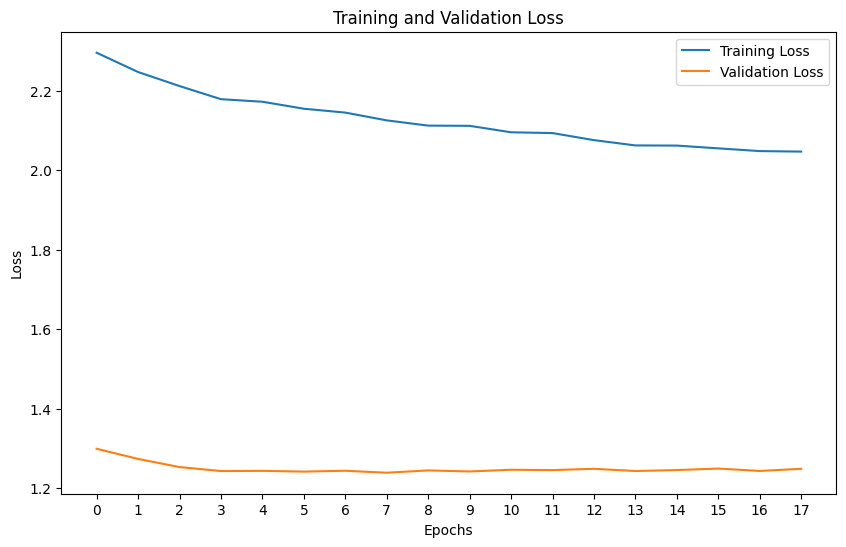

In [6]:
print(nhits_wrapper.metrics_callback.metrics["train_loss"])
print(nhits_wrapper.metrics_callback.metrics["val_loss"])

nhits_wrapper.plot_training_result()

In [2]:
model = NHiTSTrainingWrapper.load_trained_model(model_output_path + "/"  + 'NHiTS_Kreuzweg_model.pt')

In [5]:
prediction_wrapper = NHiTSPredictionWrapper(model, context_length=context_length, prediction_length=prediction_length, target_col='Kreuzweg_outflow [l/s]')
prediction_df = prediction_wrapper.predict(test_df)

/storage/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


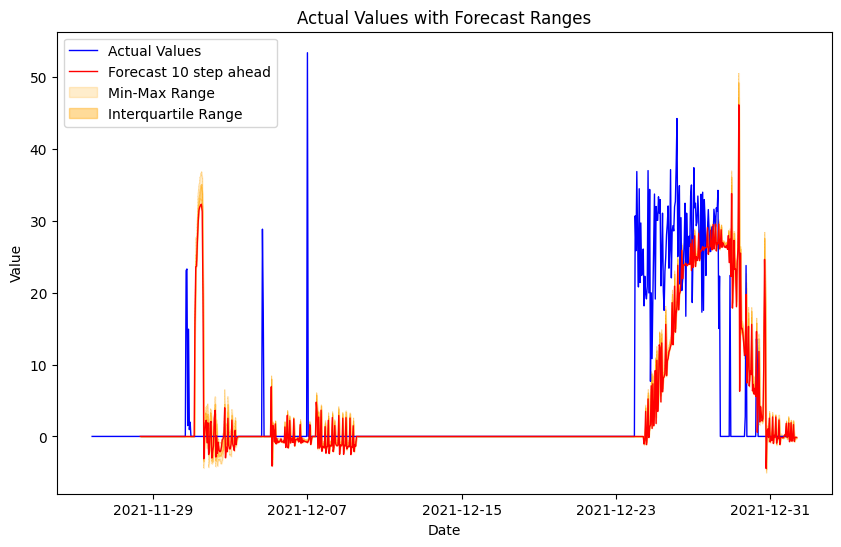

In [8]:
prediction_wrapper.plot_forecast_for_all(forecast_step_ahead=10, plot_forecast_distribution=True)

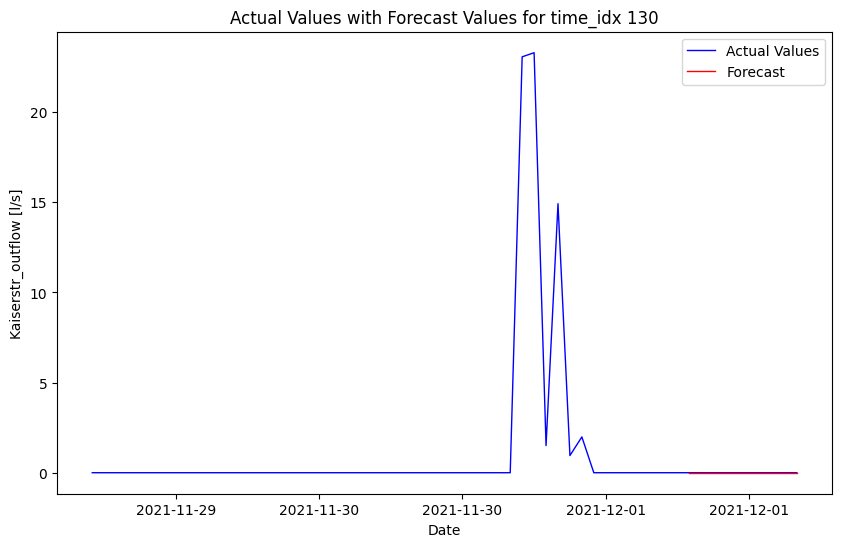

In [7]:
prediction_wrapper.plot_forecast_per_time_idx(130)

In [5]:
nhits_wrapper.save_trained_model(model_output_path + "/"  + 'NHiTS_Kreuzweg_model.pt')

In [ ]:
print(model)